# Predict students' graduation rate

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ellacharmed/mlzoomcamp-midterms-predict-graduation/submission?labpath=notebook_exploratory.ipynb)

- [dataset from @ roycekimmons.com](http://roycekimmons.com/tools/generated_data/graduation_rate)

> This is a fictional dataset and should only be used for data science training purposes.
> 
> This data set includes graduation rates from a four-year college with a variety of student factors.

The key questions we want to address:

> 1. How effective are entrance requirements at predicting gpa and graduation rate?
> 1. What would be the best way to improve graduation rates?

> All data sets are generated on-the-fly. So, you can increase your n by downloading a data set multiple times and combining the files. (n=1000) per large sample download

Based on the above statement, I have downloaded 10x times and combined them into one csv file so that we can work with a larger sample size of 10000 observations, instead of just 1000 observations.

Target is 'graduate_in_~~4~~5years', 
- a boolean representation of 'years_to_graduate'
- feature-engineered from 'years_to_graduate' as 
  - 0: 'Yes' ie 'years_to_graduate' <= 5
  - 1: 'No' ie 'years_to_graduate' > 5 
- was set to 4 years initially until EDA reveals median is 5.


In [1]:
%reload_ext autoreload
%autoreload 
import sys
from pathlib import Path

# Set the path to the current file 
current_file_path = Path().resolve()
print(f'{current_file_path = } ')

# Set the path to the data folder
data_folder_path = current_file_path / 'data'
print(f'{data_folder_path = } ')

# Set the path to the src folder
src_folder_path = current_file_path / 'src'
print(f'{src_folder_path = } ')

# Add the src folder to the system path
sys.path.append(str(src_folder_path))

# Import modules from files under /src
from config import * 
from src.data_loader import CSVDataLoader
from src.data_preprocessor import Preprocessor
from src.data_feature_builder import FeatureBuilder
from src.modeler import Trainer


current_file_path = WindowsPath('B:/repos/Courses/DataTalksClub/mlzoomcamp-midterms') 
data_folder_path = WindowsPath('B:/repos/Courses/DataTalksClub/mlzoomcamp-midterms/data') 
src_folder_path = WindowsPath('B:/repos/Courses/DataTalksClub/mlzoomcamp-midterms/src') 


## Import packages

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import seaborn as sns
from pprint import pprint

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier

There's some domain area research performed on these columns, see [README.md](/README.md#domain-area-research)

### Data Dictionary

| **Column Name**       | **Description**                               | **Range** | **Data Type** |
|-----------------------|-----------------------------------------------|-----------|---------------|
| 'act_composite_score' | The average of English, Mathematics, Reading, and Science tests. (Numerical) | 1-36 | int |
| 'sat_total_score'     | Sum of Reading & Writing, and Mathematics. (Numerical) | 400 to 1600 | int |
| 'parental_level_of_education' |  For one parent. (Categorical)   | | |
| 'parental_income' | Income for one parent, per annum. (Numerical) | | int |
| 'high_school_gpa' | Grade point average upon graduating high school. (Numerical) | 2.0 to 4.0 | float |
| 'college_gpa' | Grade point average upon graduating college. (Numerical) | 2.0 to 4.0| float |
| 'years_to_graduate' | `target` Number of years to graduate college. (Numerical) | | int  |

## Ingest Data

In [4]:
file = 'graduation_rate.csv'
CSVDataLoader().combine_files(data_folder_path)
data = CSVDataLoader().load(data_folder_path / file)

graduation*.csv
['graduation_rate_0.csv', 'graduation_rate_1.csv', 'graduation_rate_2.csv', 'graduation_rate_3.csv', 'graduation_rate_4.csv', 'graduation_rate_5.csv', 'graduation_rate_6.csv', 'graduation_rate_7.csv', 'graduation_rate_8.csv', 'graduation_rate_9.csv']
reading graduation_rate_0.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 501.35it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_1.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 673.41it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_2.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 666.71it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_3.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 661.46it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_4.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 661.56it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_5.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 666.82it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_6.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 666.82it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_7.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 500.13it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_8.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 333.44it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

reading graduation_rate_9.csv ... 
Loading CSV data...


100%|██████████| 2/2 [00:00<00:00, 400.07it/s]


Finished processing the CSV file.
df.shape = (1000, 7)

data.shape = (10000, 7)
B:\repos\Courses\DataTalksClub\mlzoomcamp-midterms\data\graduation_rate.csv
Loading CSV data...


100%|██████████| 20/20 [00:00<00:00, 240.96it/s]

Finished processing the CSV file.
df.shape = (10000, 7)


### Column names before treatment

In [5]:
data.columns

Index(['ACT composite score', 'SAT total score', 'parental level of education',
       'parental income', 'high school gpa', 'college gpa',
       'years to graduate'],
      dtype='object')

Column names contain symbols and spaces, so we are going to tidy these up by
- replacing spaces (" ") with underscore ("_"), and
- make all text lowercase.

The `'parental_level_of_education'` series also contains apostrophe ("'") in its data cells, so it's going to be removed as well.

In [6]:
data = Preprocessor().ColumnsSymbolReplacer(data)

  -- Replacing symbols in column names...


In [7]:
data = Preprocessor().SymbolReplacer(data, 'parental_level_of_education')

  -- Replacing symbols in data...


In [8]:
data.head(2).T

,0,1
act_composite_score,30,31
sat_total_score,2082,2145
parental_level_of_education,associates degree,associates degree
parental_income,82014,59761
high_school_gpa,4.0,4.0
college_gpa,3.2,3.3
years_to_graduate,5,5


### Column names after treatment

In [9]:
data.columns

Index(['act_composite_score', 'sat_total_score', 'parental_level_of_education',
       'parental_income', 'high_school_gpa', 'college_gpa',
       'years_to_graduate'],
      dtype='object')

In [10]:
numericals = data.select_dtypes(include=['int64','float64'])
categoricals = data.select_dtypes(exclude=['int64','float64'])
print(f'{numericals.columns = } ')
print(f'{categoricals.columns = } ')

numericals.columns = Index(['act_composite_score', 'sat_total_score', 'parental_income',
       'high_school_gpa', 'college_gpa', 'years_to_graduate'],
      dtype='object') 
categoricals.columns = Index(['parental_level_of_education'], dtype='object') 


There's only one column containing text and all the rest are numericals.

## Data descriptive analysis



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   act_composite_score          10000 non-null  int64  
 1   sat_total_score              10000 non-null  int64  
 2   parental_level_of_education  10000 non-null  object 
 3   parental_income              10000 non-null  int64  
 4   high_school_gpa              10000 non-null  float64
 5   college_gpa                  10000 non-null  float64
 6   years_to_graduate            10000 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 547.0+ KB


### duplicated records

In [12]:
data.duplicated().any()

False

### missing data

In [13]:
data.isnull().sum()

act_composite_score            0
sat_total_score                0
parental_level_of_education    0
parental_income                0
high_school_gpa                0
college_gpa                    0
years_to_graduate              0
dtype: int64

Insights on *duplicated* and *missing data*:

- there are no duplicated records
- there are no missing data

So, we can proceed.


## Exploratory Data Analysis

### Analysing Target

Before we look at the data and charts, it is imperative that we do not take a peek at the holdout-set as our mind is a master as seeing patterns. So, it is always a good idea to perform the split before we perform any EDA.

In [14]:
data.years_to_graduate.describe(percentiles=[.01, .5, .99])

count    10000.000000
mean         4.967600
std          1.377149
min          3.000000
1%           3.000000
50%          5.000000
99%          9.000000
max         10.000000
Name: years_to_graduate, dtype: float64

Insights:

There are some students who graduated in 3 years and some took 10 years to graduate. It is unclear if there are dropouts whose data is not collected. The majority of students did it in 5 years.

The outlier values of max is not too far off from the 99th percentile.

Let's take a deeper dive into our 'target' data.

In [15]:
data[COLS_CATEGORICAL] = data[COLS_CATEGORICAL].astype('category')

In [16]:
GRADUATE_THRESHOLD = 5
# create a new column called 'target' that is set to 0 if years_to_graduate is below the graduate_threshold, so that I can use mean() on the negative label
data['target'] = [0 if years <= GRADUATE_THRESHOLD else 1 for years in data['years_to_graduate']]

In [17]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

First, we shall group the data by 'years_to_graduate' and analyse it a few different ways.

In [18]:
target_grpby = df_full_train.groupby(['years_to_graduate']).count()
target_grpby

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa,target
years_to_graduate,,,,,,,
3,783,783,783,783,783,783,783
4,2702,2702,2702,2702,2702,2702,2702
5,2193,2193,2193,2193,2193,2193,2193
6,1178,1178,1178,1178,1178,1178,1178
7,626,626,626,626,626,626,626
8,380,380,380,380,380,380,380
9,119,119,119,119,119,119,119
10,19,19,19,19,19,19,19


In [19]:
target_grpby = target_grpby.reset_index()

In [20]:
df_full_train['target'].mean()

0.29025

In [21]:
df_full_train['target'].value_counts(normalize=True)

target
0    0.70975
1    0.29025
Name: proportion, dtype: float64

In [22]:
# df_full_train['target'] = df_full_train['target'].astype('category')

We have an imbalanced dataset. 

- 70% - negative label "0" for years_to_graduate <= 5
- 30% - positive label "1" for years_to_graduate > 5

So, I think for this simple project, it is sufficient to use class_weights set to 'balance'. But some models have a built-in mechanism to handle class imbalance, so we'll see.

### Target: pie chart

In [23]:
values0 = list(df_full_train[df_full_train['target'] == 0].years_to_graduate.value_counts())
print(f'{ values0 = }')
values1 = list(df_full_train[df_full_train['target'] == 1].years_to_graduate.value_counts())
print(f'{ values1 = }')

 values0 = [2702, 2193, 783]
 values1 = [1178, 626, 380, 119, 19]


The pie chart didn't plot the ">=" properly with the generated "values#" lists as above, so I manually created the lists from cell above and populated the 0s.

In [24]:
fig0 = px.pie(
    data_frame=df_full_train, 
    names='target', 
    values='years_to_graduate',
    title="Breakdown of 'target' positive vs negative labels")
fig0.show()

labels = ["3", "4", "5", "6", "7", "8", "9", "10"]
values0 = [1361, 1115, 372, 0, 0, 0, 0, 0]
values1 = [0, 0, 0, 551, 340, 183, 66, 12]

fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                )

fig.add_trace(go.Pie(
                labels=labels, 
                values=values0, 
                # name="years_to_graduate <= 5"
                ),
            row=1, col=1
        )
fig.add_trace(go.Pie(
                labels=labels, 
                values=values1, 
                # name="years_to_graduate > 5"
                ),
            row=1, col=2
        )
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    height=600, width=800, 
    title_text="Breakdown of 'years_to_graduate' as percentage of the whole<br>for target==0 (<=5) vs target==1 (>5)",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='<=5', x=0.2, y=0.5, font_size=20, showarrow=False),
                 dict(text='>5', x=0.8, y=0.5, font_size=20, showarrow=False)]
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [25]:
df_full_train.parental_level_of_education.nunique()

6

In [26]:
df_full_train.parental_level_of_education.value_counts()

parental_level_of_education
some college         1870
associates degree    1604
high school          1552
some high school     1459
bachelors degree      944
masters degree        571
Name: count, dtype: int64

Insights:

Not much was analysed about this feature because it was originally dropped. Subsequently fallback on lesson05's DictVectorizer and simplify the deployment process.

### Correlation

[source for title overlap issue](https://www.geeksforgeeks.org/python-plotly-how-to-prevent-title-from-overlapping-the-plot/)

In [27]:
corr = numericals.corr()

In [28]:
fig = px.imshow(
    corr.round(3), 
    color_continuous_scale='RdBu_r',
    aspect="auto",
    text_auto=True,
    # title="Heatmap of correlation of Numerical data<br><br>",
    width=800, height=600
)
# Updating the layout of the figure
fig.update_layout(barmode='group',
                  title=dict(
                      text="Heatmap of correlation of Numerical data",
                      x=0.5,
                      y=0.95,
                      xanchor='center',
                      yanchor='top',
                      font=dict(
                          size=20,
                          color='#000000'
                      )
                  ))
fig.update_layout(margin=dict(t=150))
fig.update_xaxes(side="top")
fig.show()

`years_to_graduate` has higher positive correlation to `college_gpa` than any other feature and is also reflected by the highest score by Feature importances, which totally makes sense as it is a good indicator or progress (or lack thereof).

`act_composite_score` and `sat_total_score` are highly correlated to each other and to `high_school_gpa`, so the college entry level exam score is retained and these 2 are dropped

- act_composite_score
- sat_total_score

`parental_income` has slightly positive impact on target, as it bears out that this helps defrays tuition fees and the need to get a job and thus eating into studying time, or perhaps to pay for extra tuition.

### Mutual Information

In [29]:
def mutual_info_target(series):
    return mutual_info_score(series, df_full_train.target)

In [30]:
mi = df_full_train.apply(mutual_info_target)
mi.sort_values(ascending=False)

years_to_graduate              0.602375
target                         0.602375
parental_income                0.572544
sat_total_score                0.053258
college_gpa                    0.042112
parental_level_of_education    0.003610
act_composite_score            0.001971
high_school_gpa                0.001757
dtype: float64

### Feature Importances

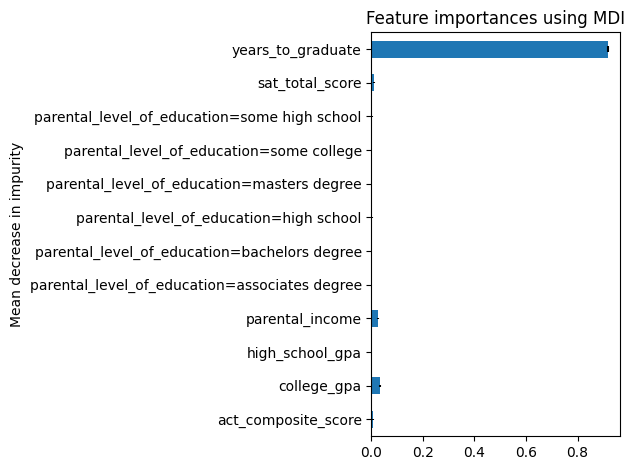

In [31]:
y_train = df_train.target.values
train_dicts = df_train.drop(['target'], axis=1).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
feature_names = dv.feature_names_
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=std, ax=ax) #yerr=std,
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Final features set

Based on the correlation, mutual information and feature importances analysis above, which all seems to corroborate each other, only these 3 features will be considered for the hyperparameter tuning stage. So that the training can be sped up.

- sat_total_score
- parental_income
- college_gpa  

However, after reaching the deployment stage, initial Pipelines code didn't work to accept and validate html inputs, so have reverted back to use DictVectorizer as per lesson. Due to this and from hyperparameter tuning of Catboost Classifer, have decided to re-add the categorical column `'parental_level_of_education'`. This also means the web-service is not deployed to a web framework. Something to test after submission deadline, for capstone practice.

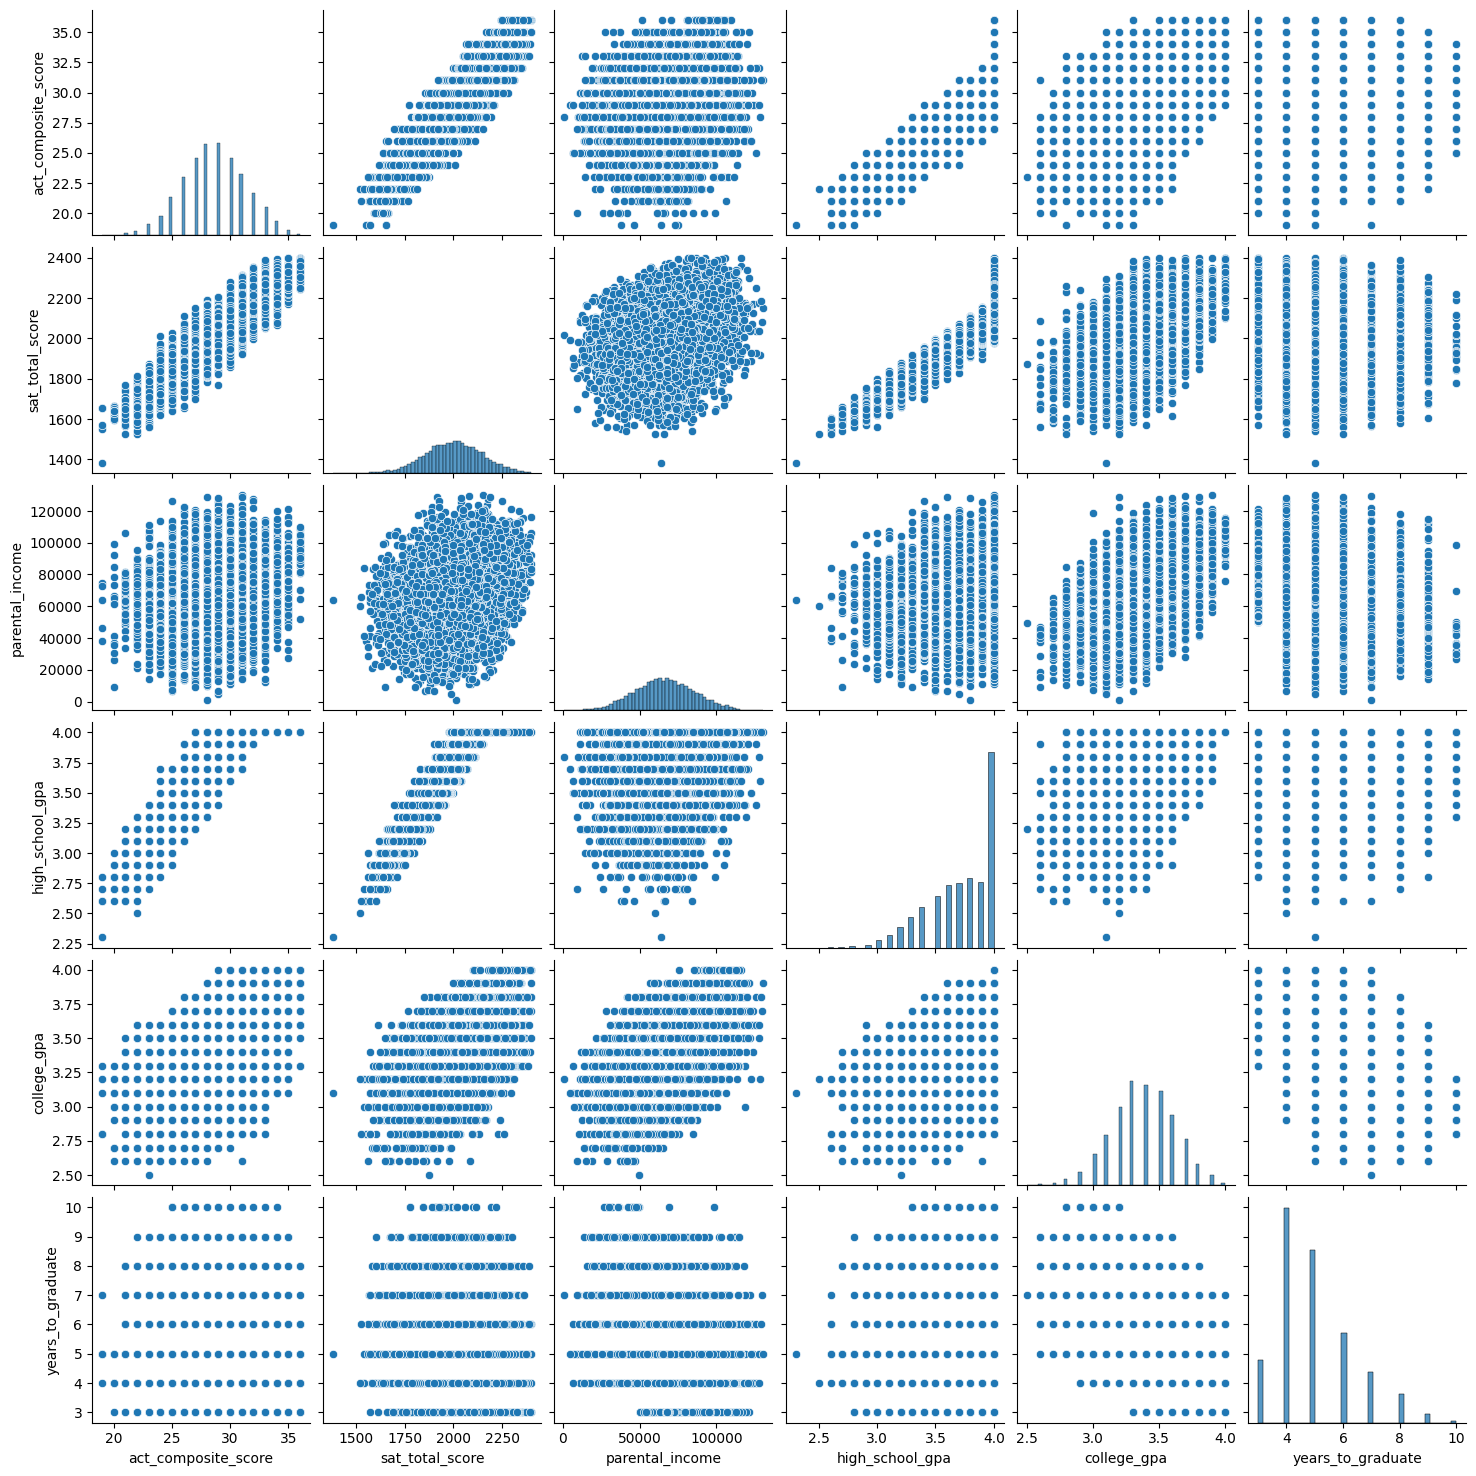

In [32]:
sns.pairplot(numericals);

## Preprocessing

### Outliers: before treatment

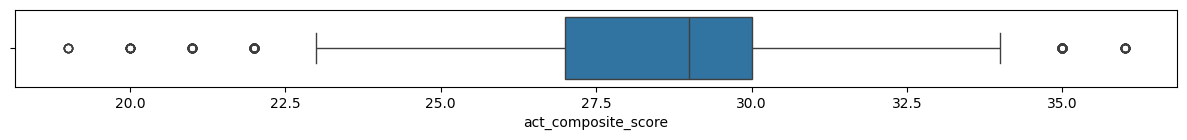

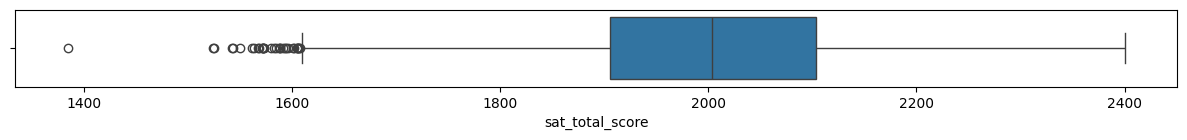

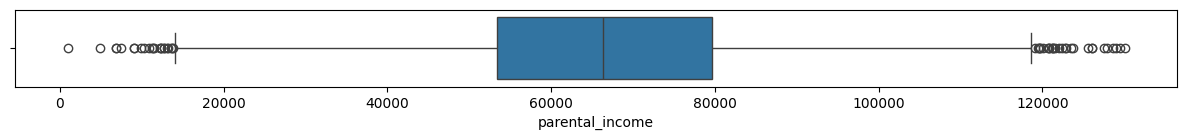

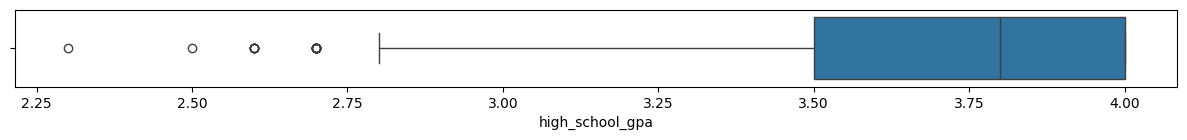

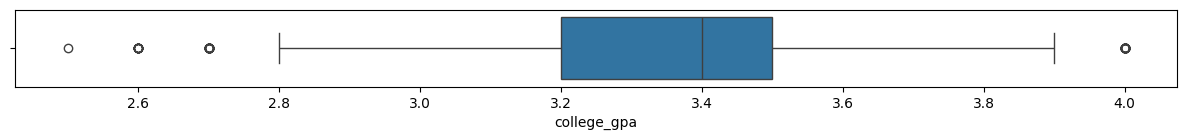

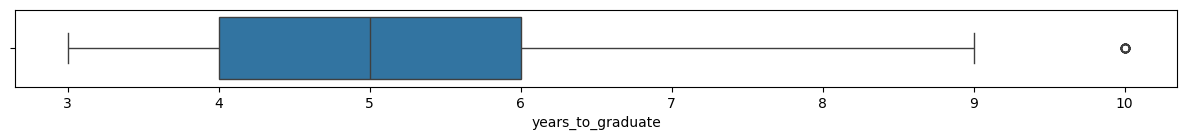

In [33]:
for column in numericals.columns.to_list():
    plt.figure(figsize=(15,1))
    sns.boxplot(data=numericals, x=column)

plt.show()


Insights: some outliers we need to treat with setting all outliers to the median values.

In [34]:
numericals = Preprocessor().OutliersTransformer(numericals)

  -- Transforming outliers...


### Outliers: after treatment

Features that still show as having outliers are going to get dropped anyways, so no further time was spent on why the treatment didn't "take" on some values. As for the outliers in 'years_to_graduate', it is being binned to positive and negative labels, so not a concern at all.

For 'parental_income', and the others, these are also getting scaled.

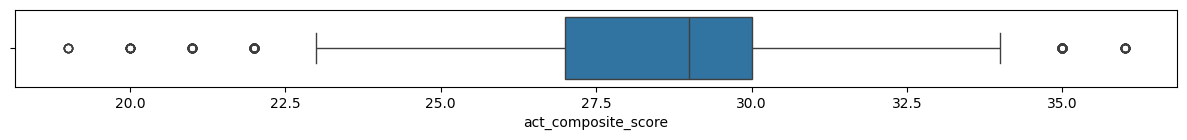

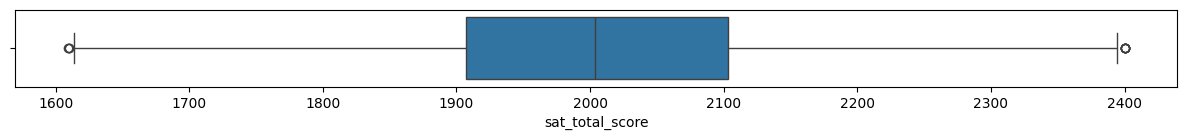

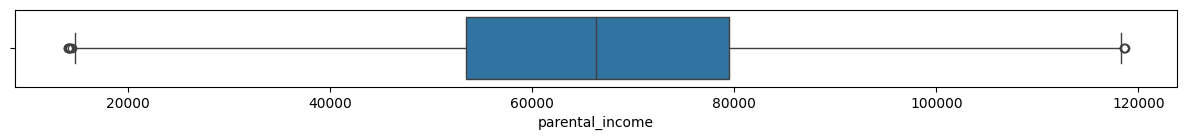

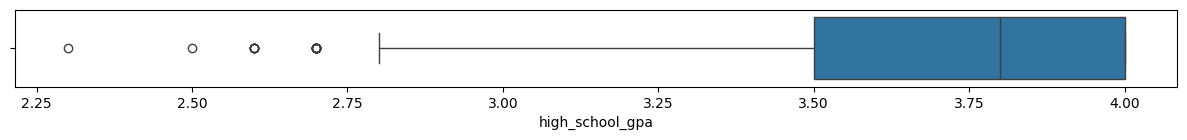

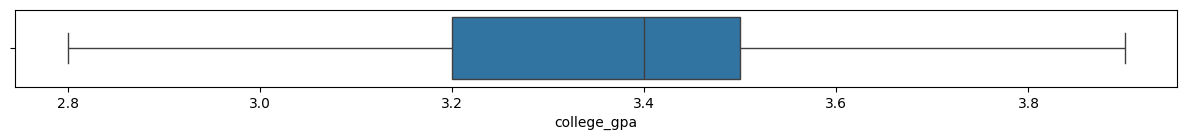

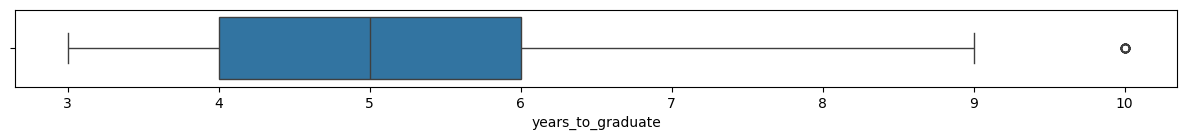

In [35]:
for column in numericals.columns.to_list():
    plt.figure(figsize=(15,1))
    sns.boxplot(data=numericals, x=column)

plt.show()

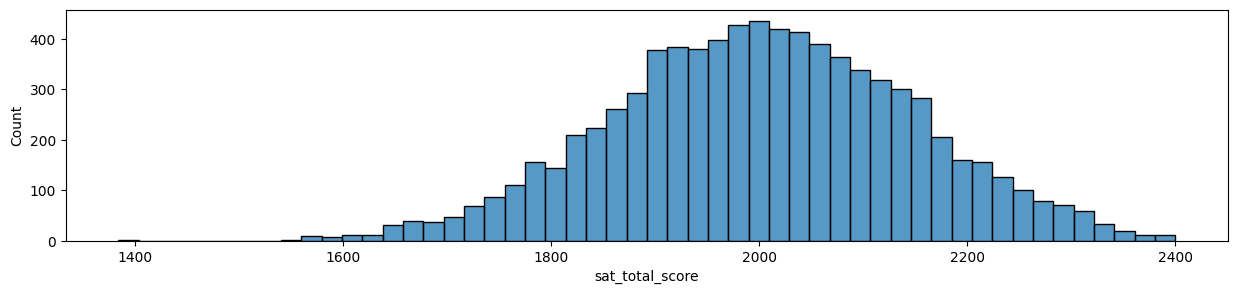

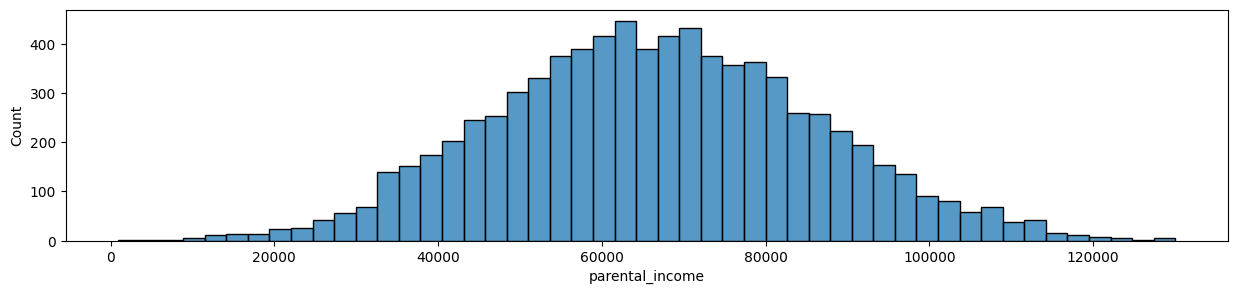

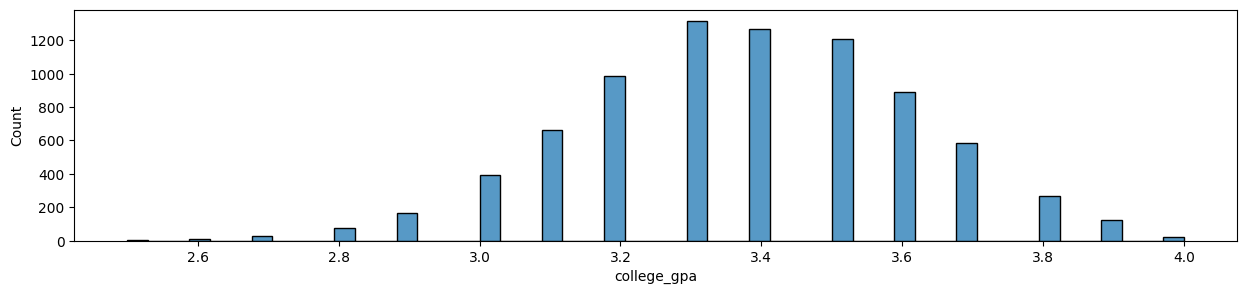

In [36]:
for column in COLS_NUMERICAL:
    plt.figure(figsize=(15,3))
    sns.histplot(data=df_full_train[COLS_NUMERICAL], x=column)

plt.show()

In [37]:
fig = px.histogram(df_full_train, 
                   x='parental_level_of_education', 
                   color='years_to_graduate', 
                   facet_col='target',
                   opacity=0.45,
                   category_orders=dict(years_to_graduate=['3', '4', '5', '6', '7', '8', '9', '10']),
                   marginal='box',
                   title="Distribution of 'parents educational level' by 'years_to_graduate' across target")
fig.show()

Insights:

Not much can be gleaned from this 'parental_level_of_education' feature as can be seen from above chart. And as confirmed, it has a low correlation and feature importances score.

In [38]:
fig = px.scatter(
    df_full_train, 
    x='college_gpa', 
    y='high_school_gpa', 
    facet_col='target',
    # opacity=0.45,
    # histfunc='count', 
    title="Comparison of 'high_school_gpa' against 'college_gpa'")
fig.show()

Insights:

Not much use as well, they look similar.

In [39]:
fig = px.scatter(
    df_full_train, 
    x='college_gpa', 
    y='sat_total_score', 
    facet_col='target',
    # marginal_y='years_to_graduate',
    # opacity=0.45,
    # histfunc='count', 
    title="Comparison of 'sat_total_score' against 'college_gpa'")
fig.show()

In [40]:
fig = px.scatter(
    df_full_train, 
    x='college_gpa', 
    y='sat_total_score', 
    # facet_row='target',
    color='years_to_graduate',
    size='target',
    # opacity=0.45,
    # histfunc='count', 
    title="Comparison of 'high_school_gpa' against 'college_gpa'")
fig.show()

In [41]:
df_full_train.sat_total_score.describe(percentiles=[.01, .25, .50, .75, .99])

count    8000.00000
mean     2002.50100
std       143.55161
min      1384.00000
1%       1662.00000
25%      1905.00000
50%      2003.00000
75%      2103.00000
99%      2317.01000
max      2400.00000
Name: sat_total_score, dtype: float64

### Assumptions

Looking at all the above plots, gonna make assumptions as follows, about this totally fictional dataset:

- in this fictional college of some faraway land, the `sat_total_score` has [min, max] range of [1500, 2400]
- the parental data is assumed to be for just one parent
- students are those just finishing high-school and not working adults returning to pursue more education
- when students do not graduate beyond the 5th year, they were not given any ultimatums to "*shape up or else*" and allowed to get to the 10th year
- also not clear if there are students who take longer than 10 years and automatically labeled a "dropout" and didn't earn their undergraduate degrees


### Insights

Some preliminary insights:
 
- more than any other feature, current gpa earned in college is the best indicator of years spent in college to earn that degree
- sat_scores could be an early indicator but not totally reliable
- no correlation can be made due to lack of data on students' socioeconomic profile based on just one datapoint of one parent's income
- one's parents intelligence or lack of paper-qualifications has no bearing on one's own measure of finishing college
  

### Questions to guide further EDA for final feature selection, model selection and final report

Following questions, moved out to its own notebook for deeper dive on EDA. 

- if college_gpa has highest feature importance, can modeling be done with just this one feature?
- would the DictVecorizer or OrdinalEncoder be better suited for the feature 'parental_level_of_education'?
- might 'parental_income' being binned and changed as categorical improve model's metrics?

### Out-of-scope

As important as doing the needful analyis, it is also important in knowing what to exclude; in context of project's purpose and objective, time and other constraints (availability of data and possible augmenting of data)

Above questions for deeper dive would depend on how, if any, technical difficulties would surface for an end-to-end Machine Learning Project within the 2 weeks timeframe.


In [42]:
# data[['parental_level_of_education', 'high_school_gpa', 'years_to_graduate']] = data[['parental_level_of_education', 'high_school_gpa', 'years_to_graduate']].astype('category')

# moot point as feature is not important, can use DV in any case
# data['parental_level_of_education'] = data['parental_level_of_education'].map(EDUCATION_VALUES)


## BASELINE ML STARTS HERE

### import sklearn packages

In [43]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### split dataset with train_test_split

do we want 
- 2 splits for train, test or 
- 3 splits for train, val and test?

reminder: 
- not yet stratify
- not scaled
- use cross-validation 
- save final df to file as processed_df.csv?

Loading CSV data...


100%|██████████| 20/20 [00:00<00:00, 273.98it/s]


Finished processing the CSV file.
df.shape = (10000, 7)
  -- Replacing symbols in column names...
  -- Replacing symbols in data...
data.shape = (10000, 7)


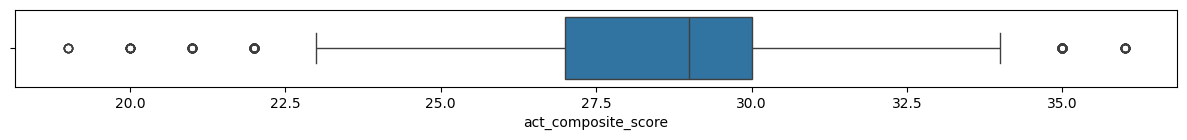

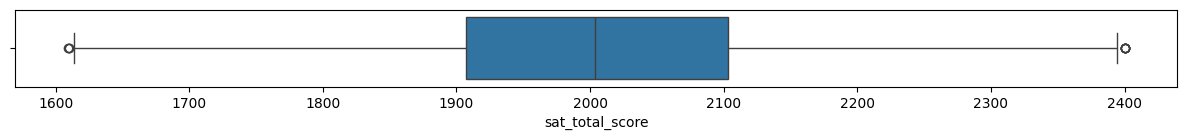

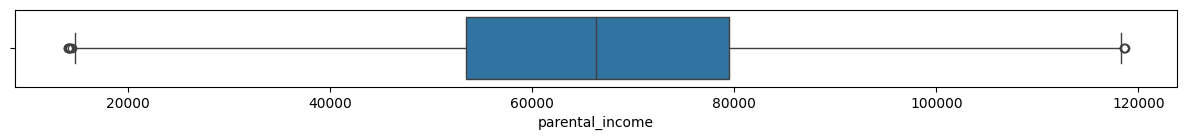

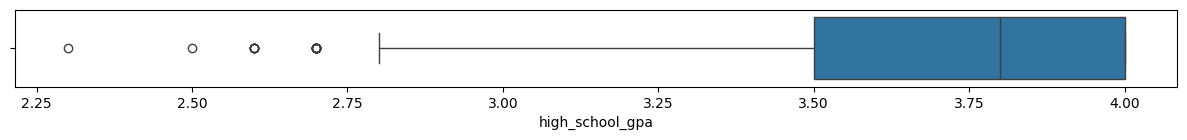

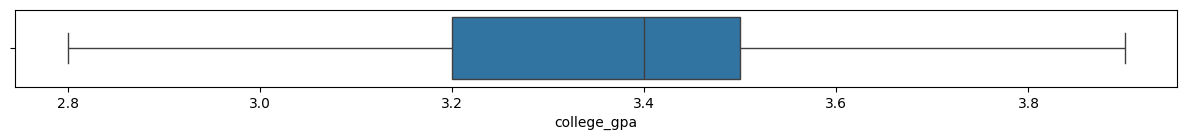

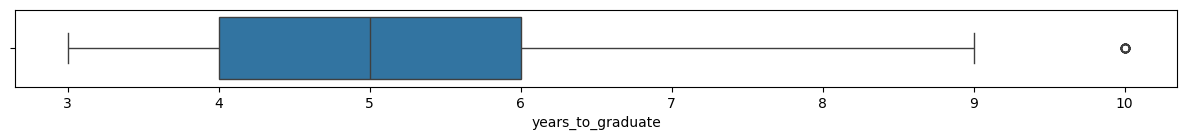

In [44]:
data = CSVDataLoader().load('data/graduation_rate.csv') 
data = Preprocessor().ColumnsSymbolReplacer(data)
data = Preprocessor().SymbolReplacer(data, 'parental_level_of_education')

print(f'{data.shape = }')
for column in numericals.columns.to_list():
    plt.figure(figsize=(15,1))
    sns.boxplot(data=numericals, x=column)

plt.show()

In [45]:
numericals = data.select_dtypes(include=['int64','float64'])
print(f'{numericals.columns = } ')

numericals.columns = Index(['act_composite_score', 'sat_total_score', 'parental_income',
       'high_school_gpa', 'college_gpa', 'years_to_graduate'],
      dtype='object') 


In [46]:
data[numericals.columns] = Preprocessor().OutliersTransformer(numericals, 0.05, 0.95) # need to be done before TargetEncoder(), that drop columns
data = FeatureBuilder().Target_encoder(data)

  -- Transforming outliers...
  -- Creating 'target' column...


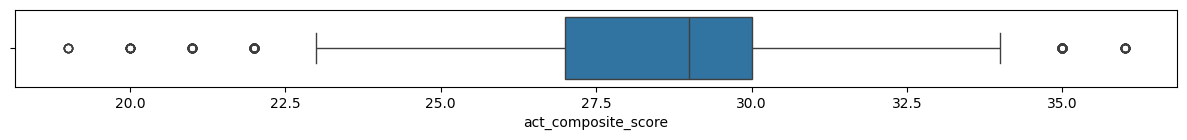

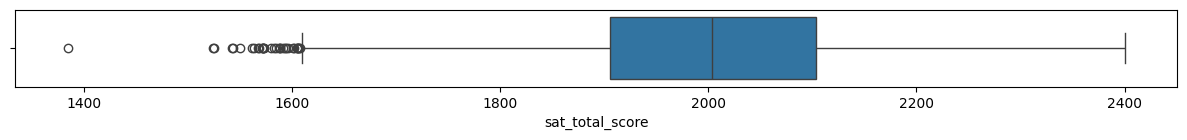

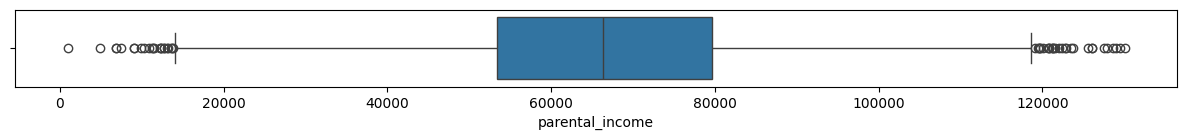

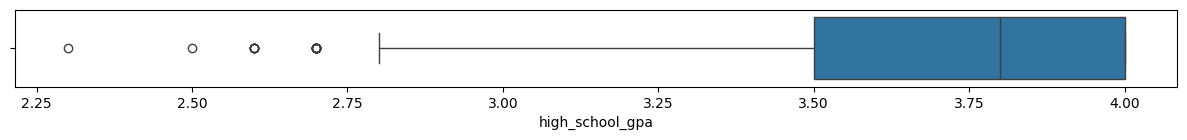

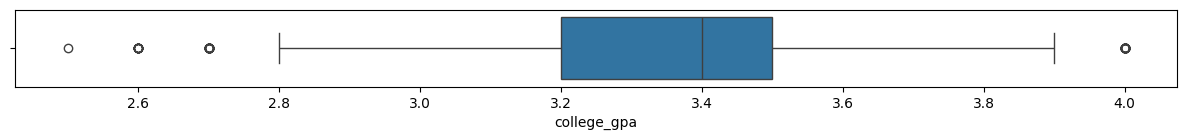

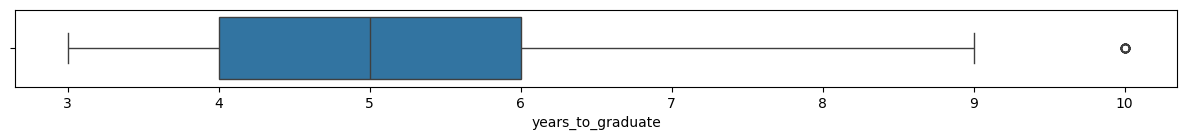

In [47]:
for column in numericals.columns.to_list():
    plt.figure(figsize=(15,1))
    sns.boxplot(data=numericals, x=column)

plt.show()

In [48]:
data.head(2).T

,0,1
act_composite_score,30,31
sat_total_score,2082.0,2145.0
parental_level_of_education,associates degree,associates degree
parental_income,82014.0,59761.0
high_school_gpa,4.0,4.0
college_gpa,3.2,3.3
target,0,0


In [49]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [50]:
y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values
# print(len(y_train), len(y_val), len(y_test))
print(y_train.shape, y_val.shape, y_test.shape)
print(y_train[:5])

(6000,) (2000,) (2000,)
[0 0 0 0 0]


In [51]:
df_train = df_train.drop(['target'], axis=1).reset_index(drop=True)
df_val = df_val.drop(['target'], axis=1).reset_index(drop=True)
df_test = df_test.drop(['target'], axis=1).reset_index(drop=True)
# print(len(df_train), len(df_val), len(df_test))
print(df_train.shape, df_val.shape, df_test.shape)

(6000, 6) (2000, 6) (2000, 6)


#### confirming `df_train` for initial code

> [!IMPORTANT] 
> 
> Needs to show full 6 features

In [52]:
df_train.sample(4)

,act_composite_score,sat_total_score,parental_level_of_education,parental_income,high_school_gpa,college_gpa
5350,31,2169.0,associates degree,60429.0,4.0,3.6
113,27,1881.0,associates degree,77674.0,3.4,3.3
2339,27,1837.0,associates degree,94020.0,3.4,3.4
968,31,2198.0,associates degree,67437.0,4.0,3.8


### LogisticRegression

In [53]:
scores = []


In [54]:
# X_vectorizer takes train and returns the fit_transformed dv of that
dv, X_train  = Trainer().X_vectorizer(df_train)

model = LogisticRegression()
model.fit(X_train, y_train)

# y_predictor used dv on passed-in DF and predict with model, 
# caters for both probability and [0,1] cases 
y_train_prob = model.predict(X_train)
y_pred_prob, y_pred = Trainer().y_predictor(df_val, dv, model)

scores.append({
            "model": "LogisticRegression()", 
            "train auc": roc_auc_score(y_train, y_train_prob),
            "val auc": roc_auc_score(y_val, y_pred),
            "accuracy": accuracy_score(y_val, y_pred),
            "precision": precision_score(y_val, y_pred),
            "f1_mean": f1_score(y_val, y_pred),
            "recall": recall_score(y_val, y_pred),
        }
)

### DecisionTreeClassifier

In [55]:
# X_vectorizer takes train and returns the fit_transformed dv of that
dv, X_train  = Trainer().X_vectorizer(df_train)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# y_predictor used dv on passed-in DF and predict with model, 
# caters for both probability and [0,1] cases 
y_train_prob = model.predict(X_train)
y_pred_prob, y_pred = Trainer().y_predictor(df_val, dv, model)

scores.append({
            "model": "DecisionTreeClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_prob),
            "val auc": roc_auc_score(y_val, y_pred),
            "accuracy": accuracy_score(y_val, y_pred),
            "precision": precision_score(y_val, y_pred),
            "f1_mean": f1_score(y_val, y_pred),
            "recall": recall_score(y_val, y_pred),
        }
)

In [56]:
from sklearn.tree import export_text
# print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

### RandomForestClassifier

In [57]:
# X_vectorizer takes train and returns the fit_transformed dv of that
dv, X_train  = Trainer().X_vectorizer(df_train)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# y_predictor used dv on passed-in DF and predict with model, 
# caters for both probability and [0,1] cases 
y_train_prob = model.predict(X_train)
y_pred_prob, y_pred = Trainer().y_predictor(df_val, dv, model)


# compile scores
scores.append({
            "model": "RandomForestClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_prob),
            "val auc": roc_auc_score(y_val, y_pred),
            "accuracy": accuracy_score(y_val, y_pred),
            "precision": precision_score(y_val, y_pred),
            "f1_mean": f1_score(y_val, y_pred),
            "recall": recall_score(y_val, y_pred),
        }
)

### GradientBoostingClassifier

In [58]:
# X_vectorizer takes train and returns the fit_transformed dv of that
dv, X_train  = Trainer().X_vectorizer(df_train)

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# y_predictor used dv on passed-in DF and predict with model, 
# caters for both probability and [0,1] cases 
y_train_prob = model.predict(X_train)
y_pred_prob, y_pred = Trainer().y_predictor(df_val, dv, model)


# compile scores
scores.append({
            "model": "GradientBoostingClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_prob),
            "val auc": roc_auc_score(y_val, y_pred),
            "accuracy": accuracy_score(y_val, y_pred),
            "precision": precision_score(y_val, y_pred),
            "f1_mean": f1_score(y_val, y_pred),
            "recall": recall_score(y_val, y_pred),
        }
)

### HistGradientBoostingClassifier

In [59]:
# X_vectorizer takes train and returns the fit_transformed dv of that
dv, X_train  = Trainer().X_vectorizer(df_train)

model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# y_predictor used dv on passed-in DF and predict with model, 
# caters for both probability and [0,1] cases 
y_train_prob = model.predict(X_train)
y_pred_prob, y_pred = Trainer().y_predictor(df_val, dv, model)


# compile scores
scores.append({
            "model": "HistGradientBoostingClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_prob),
            "val auc": roc_auc_score(y_val, y_pred),
            "accuracy": accuracy_score(y_val, y_pred),
            "precision": precision_score(y_val, y_pred),
            "f1_mean": f1_score(y_val, y_pred),
            "recall": recall_score(y_val, y_pred),
        }
)

### xgboost

In [60]:
# xgb_params = {
#     'eta': 0.3, 
#     'max_depth': 6,
#     'min_child_weight': 1,
    
#     'objective': 'binary:logistic',
#     'nthread': 8,
    
#     'seed': 1,
#     'verbosity': 1,
# }


# X_vectorizer takes train and returns the fit_transformed dv of that
dv, X_train  = Trainer().X_vectorizer(df_train)

model = XGBClassifier() # **xgb_params
model.fit(X_train, y_train)

# y_predictor used dv on passed-in DF and predict with model, 
# caters for both probability and [0,1] cases 
y_train_prob = model.predict(X_train)
y_pred_prob, y_pred = Trainer().y_predictor(df_val, dv, model)

scores.append({
            "model": "XGBClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_prob),
            "val auc": roc_auc_score(y_val, y_pred),
            "accuracy": accuracy_score(y_val, y_pred),
            "precision": precision_score(y_val, y_pred),
            "f1_mean": f1_score(y_val, y_pred),
            "recall": recall_score(y_val, y_pred),
        }
)

### catboost

In [61]:
# X_vectorizer takes train and returns the fit_transformed dv of that
dv, X_train  = Trainer().X_vectorizer(df_train)
# treated with dv, so no need explicit cat_features=COLS_CATEGORICAL
model = CatBoostClassifier(random_seed=42,verbose=False) 
model.fit(X_train, y_train)

# y_predictor used dv on passed-in DF and predict with model, 
# caters for both probability and [0,1] cases 
y_train_prob = model.predict(X_train)
y_pred_prob, y_pred = Trainer().y_predictor(df_val, dv, model)

scores.append({
            "model": "CatBoostClassifier()", 
            "train auc": roc_auc_score(y_train, y_train_prob),
            "val auc": roc_auc_score(y_val, y_pred),
            "accuracy": accuracy_score(y_val, y_pred),
            "precision": precision_score(y_val, y_pred),
            "f1_mean": f1_score(y_val, y_pred),
            "recall": recall_score(y_val, y_pred),
        }
)

### model evaluation

In [62]:
print(f"Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment")
base_scores_df = pd.DataFrame(scores).sort_values(by='val auc', ascending=False)
base_scores_df

Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment


,model,train auc,val auc,accuracy,precision,f1_mean,recall
5,XGBClassifier(),0.776820,0.599475,0.7265,0.616236,0.379115,0.273770
2,RandomForestClassifier(),1.000000,0.590718,0.7220,0.605469,0.357968,0.254098
3,GradientBoostingClassifier(),0.600667,0.589910,0.7375,0.745665,0.329502,0.211475
4,HistGradientBoostingClassifier(),0.666602,0.587717,0.7255,0.635556,0.342515,0.234426
1,DecisionTreeClassifier(),1.000000,0.585753,0.6550,0.430796,0.419192,0.408197
6,CatBoostClassifier(),0.659885,0.584196,0.7270,0.658416,0.327586,0.218033
0,LogisticRegression(),0.500351,0.500000,0.6950,0.000000,0.000000,0.000000


In [63]:
output_file = Path('baseline_scores.csv')
print(output_file)
if output_file.exists():
   print(f'{output_file} exists, not overwritten.')
else:
   base_scores_df.to_csv(output_file, index=False, header=True, mode='w')

baseline_scores.csv
baseline_scores.csv exists, not overwritten.


Insights of full-featured model:

- the tree-based models are overfitting, looking at the TRAIN scores = 1.0, because in using defaults, the `max_depth` and `early_stopping_rounds` were not specified
- Logistic Regression performs the **worst** out of all listed models 
- Gradient Boosting Classifier performs the **best** out of all listed models 

### looping

### classifiers

In [64]:
# Create the nested dict of dicts
classifiers = {
    'logistic': {
        'estimator': LogisticRegression(),
    },      
    'logisticCV': {
        'estimator': LogisticRegressionCV(),
    }, 
    'decision_tree': {
        'estimator': DecisionTreeClassifier(),                      
    },               
    'random_forest': {
        'estimator': RandomForestClassifier(),
    },
    'grad_boost': {
        'estimator': GradientBoostingClassifier(),
    }, 
    'histgrad_boost': {
        'estimator': HistGradientBoostingClassifier(),
    },
    'knn': {
        'estimator': KNeighborsClassifier()          
    }, 
    'xgboost': {
        'estimator': XGBClassifier(),
    },                 
    'catboost': {
        'estimator': CatBoostClassifier(verbose=False),
    } 
}

In [65]:
estimators = []
scores_loop = []

for classifier in classifiers:
  estimator = classifiers[classifier]['estimator']
  estimators.append(estimator)
  
# print(estimators)

In [66]:
# Train and predict each classifier in the pipeline
for classifier in estimators:
    # X_vectorizer takes train and returns the fit_transformed dv of that
    dv, X_train  = Trainer().X_vectorizer(df_train)
    classifier.fit(X_train, y_train)

    # y_predictor used dv on passed-in DF and predict with model, 
    # caters for both probability and [0,1] cases 
    y_train_prob = classifier.predict(X_train)
    y_pred_prob, y_pred = Trainer().y_predictor(df_val, dv, classifier)

    # evaluate
    scores_loop.append(
        {
            "model": classifier,
            "train auc": roc_auc_score(y_train, y_train_prob),
            "val auc": roc_auc_score(y_val, y_pred),
            "accuracy": accuracy_score(y_val, y_pred),
            "precision": precision_score(y_val, y_pred),
            "f1_mean": f1_score(y_val, y_pred),
            "recall": recall_score(y_val, y_pred),
        }
    )

KeyboardInterrupt: 

#### confirming `df_train` for looping code

> [!IMPORTANT] 
> Needs to show all features

In [ ]:
df_train.sample(4)

In [ ]:
print(f"Looping code. Scores comparison, baseline estimators with all defaults, no scaling of data, no outliers treatment")

In [ ]:
scores_file = Path('baseline_loop_scores.csv')
if scores_file.exists():
    print(f'{scores_file} exists, not overwritten.')
    scores_loop_df = pd.read_csv(scores_file)
else:
    scores_loop_df = pd.DataFrame(scores_loop).sort_values(by='val auc', ascending=False)
    scores_loop_df.to_csv(scores_file, index=False, header=True, mode='w')


In [ ]:
scores_df = pd.read_csv('baseline_scores.csv')
print(f'BASELINE SCORES')
display(scores_df)

scores_loop_df = pd.read_csv('baseline_scores.csv')
print(f'BASELINE SCORES from looping code')
display(scores_loop_df)

Insights from baseline modeling using defaults parameters:

- the tree-based models are overfitting, looking at the TRAIN scores = 1.0, because in using defaults, the `max_depth` and `early_stopping_rounds` were not specified
- Logistic Regression performs the **worst** out of all listed models 
- CatBoost Classifier performs the **best** out of all listed models 

Now that we've worked on a script to loop through our models, we can work on 

1. tuning the parameters,
1. introduce pipelines to 
   - treating the outliers,
   - scaling the data, because income and gpa are on extremely different scales
   - ~~drop columns that has high correlation or mutual info scores~~

## Hyperparameters Tuning

this will be carried out in a [separate notebook](/notebook_model_tuning.ipynb)